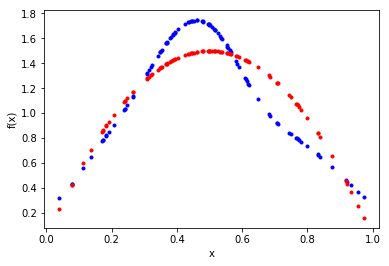

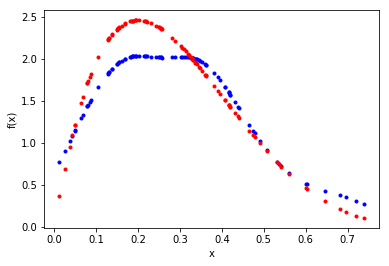

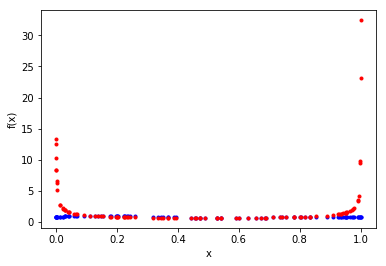

In [3]:
#question 1
import numpy as np
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm 
from matplotlib import pyplot as plt

def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list

def density(a,b,n):
    x = np.random.beta(a,b,n)
    h = 1.06*((np.var(x))**0.5)*n**(-1/5) 
    '''given in wikipedia as optimal choice for bandwidth'''
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    '''Normal function defined above as standard normal function'''
    plt.plot(x,B,'b.')
    '''plotting the x variables against f(x) as defined '''
    plt.plot(x,beta.pdf(x,a,b),'r.')
    '''plotting the x as per the given distribution'''
    plt.xlabel('x')
    plt.ylabel('f(x)')
    return plt.show()





density(2,2,100)
density(2,5,100)
density(0.5,0.5,100)



hence we see that the kernel density functions map the original distribution .

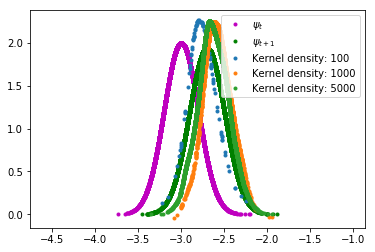

In [4]:
# solution2

import numpy as np
from scipy import stats
from scipy.stats import norm 
from matplotlib import pyplot as plt

rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

x= norm.rvs(mu,s, size=10000)
fx = norm.pdf(x,mu,s)
plt.plot(x,fx,'m.', label='$\psi_t$')
plt.axis('equal')
plt.legend()


x1= norm.rvs(rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5, size=10000)
fx1= norm.pdf(x1, rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5)
plt.plot(x1,fx1,'g.', label='$\psi_{t+1}$')
plt.legend()
plt.xlim(-4,-2)


def draws(n,mu,s):
    x = s*np.random.randn(n)+mu
    return x

def update(n,mu,s):
    xt1=rho*draws(n,mu,s)+b+sigma*(np.random.randn(1))
    return xt1


def density(x,n):
    h = 1.06*((np.var(x))**0.5)*n**(-1/5)
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    plt.plot
    return x,B

def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list

for i,j in enumerate([100,1000,5000]): 
    A = density(update(j,mu,s),j)
    plt.plot(A[0], A[1], '.', label=""'Kernel density: '+str(j))
    plt.axis('equal')
    plt.legend()
plt.show()
   

Solution 3:
We can write:
$$||A^{k}|| = ||A^{k-1}*A||^k$$
By the multiplicative property proved in class, we have 
$$\Rightarrow ||A^k||\le ||A^{k-1}||^{k*1/k}*||A||$$
$$\Rightarrow \lim_{k\rightarrow\infty}||A||^k \le \left[\lim_{k\rightarrow\infty}||A^{k-1}||^{1/k}\right]^k||A||$$
Applying Gelfand's formula and noting that $\lim_{k\rightarrow\infty}r(A)^k=0$
$$\Rightarrow \lim_{k\rightarrow\infty}||A||^k \le 0$$
Since Norm is non negative, the inequality cannot hold. Hence
$$\lim_{k\rightarrow\infty}||A||^k = 0$$